Processing normalization...


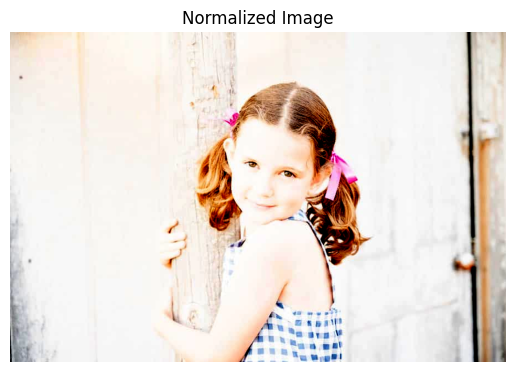

Processing denoising...


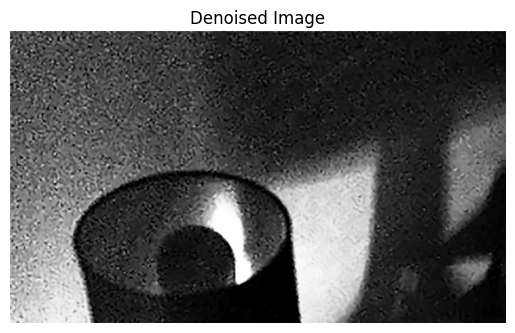

Processing sharpening...


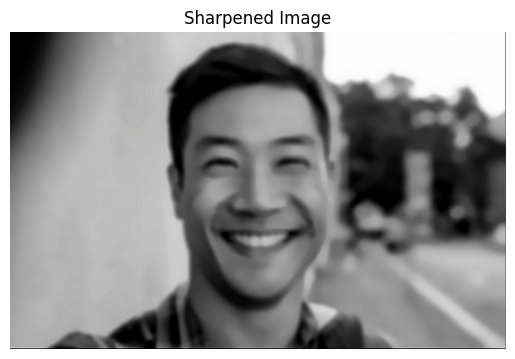

Processing complete:
Normalized: output_normalized.jpg
Denoised: output_denoised.jpg
Sharpened: output_sharpened.jpg


In [13]:
import cv2
import numpy as np
from skimage import exposure, util
import matplotlib.pyplot as plt

def process_normalize(image_path, output_path):
    # Load image
    image = cv2.imread(image_path)
    if image is None:
        raise ValueError("Image not found or unable to load.")

    # Convert to RGB
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Convert to float
    image_rgb = util.img_as_float(image_rgb)

    # Normalize the image
    p2, p98 = np.percentile(image_rgb, (2, 98))
    normalized_image = exposure.rescale_intensity(image_rgb, in_range=(p2, p98))


    cv2.imwrite(output_path, (normalized_image * 255).astype(np.uint8))

    # Display the normalized image
    plt.imshow(normalized_image)
    plt.axis('off')
    plt.title('Normalized Image')
    plt.show()

def process_denoise(image_path, output_path):
    # Load image
    image = cv2.imread(image_path)
    if image is None:
        raise ValueError("Image not found or unable to load.")

    # Convert to RGB
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Convert to float
    image_rgb = util.img_as_float(image_rgb)

    # Normalize first
    p2, p98 = np.percentile(image_rgb, (2, 98))
    image_rgb_rescale = exposure.rescale_intensity(image_rgb, in_range=(p2, p98))

    # Denoise the image
    denoised_image = cv2.fastNlMeansDenoisingColored((image_rgb_rescale * 255).astype(np.uint8), None, 10, 10, 7, 21)
    denoised_image = cv2.cvtColor(denoised_image, cv2.COLOR_BGR2RGB)

    cv2.imwrite(output_path, (util.img_as_float(denoised_image) * 255).astype(np.uint8))

    # Display the denoised image
    plt.imshow(denoised_image)
    plt.axis('off')
    plt.title('Denoised Image')
    plt.show()

def process_sharpen(image_path, output_path):
    # Load image
    image = cv2.imread(image_path)
    if image is None:
        raise ValueError("Image not found or unable to load.")

    # Convert to RGB
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Convert to float
    image_rgb = util.img_as_float(image_rgb)

    # Normalize first
    p2, p98 = np.percentile(image_rgb, (2, 98))
    image_rgb_rescale = exposure.rescale_intensity(image_rgb, in_range=(p2, p98))

    # Denoise the image
    denoised_image = cv2.fastNlMeansDenoisingColored((image_rgb_rescale * 255).astype(np.uint8), None, 10, 10, 7, 21)
    denoised_image = cv2.cvtColor(denoised_image, cv2.COLOR_BGR2RGB)

    # Sharpen the image
    kernel = np.array([[0, -1, 0],
                       [-1, 5, -1],
                       [0, -1, 0]])
    sharpened_image = cv2.filter2D(denoised_image, -1, kernel)

    cv2.imwrite(output_path, (util.img_as_float(sharpened_image) * 255).astype(np.uint8))

    # Display the sharpened image
    plt.imshow(sharpened_image)
    plt.axis('off')
    plt.title('Sharpened Image')
    plt.show()

# File paths
input_overexposed = 'overexposed.jpg'
output_normalize = 'output_normalized.jpg'

input_grainy = 'grainy.jpg'
output_denoise = 'output_denoised.jpg'

input_blurry = 'blurry1.jpg'
output_sharpen = 'output_sharpened.jpg'

print("Processing normalization...")
process_normalize(input_overexposed, output_normalize)

print("Processing denoising...")
process_denoise(input_grainy, output_denoise)

print("Processing sharpening...")
process_sharpen(input_blurry, output_sharpen)

print(f"Processing complete:\nNormalized: {output_normalize}\nDenoised: {output_denoise}\nSharpened: {output_sharpen}")
